

> Indented block
# Importing Necessary Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm


# Reading Csv File

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data science/Ml project 2 Wind/intermittent-renewables-production-france.csv")

# Dataset

In [ ]:
df

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00+02:00,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23 07:00:00+02:00,2020-07-23,07:00:00,08:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23 16:00:00+02:00,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23 19:00:00+02:00,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23 23:00:00+02:00,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July
...,...,...,...,...,...,...,...,...,...
59801,2023-06-30 06:00:00+02:00,2023-06-30,06:00:00,07:00:00,Solar,55.0,181,Friday,June
59802,2023-06-30 13:00:00+02:00,2023-06-30,13:00:00,14:00:00,Solar,4554.0,181,Friday,June
59803,2023-06-30 14:00:00+02:00,2023-06-30,14:00:00,15:00:00,Solar,4589.0,181,Friday,June
59804,2023-06-30 16:00:00+02:00,2023-06-30,16:00:00,17:00:00,Solar,4173.0,181,Friday,June


# Checking Null Values

In [ ]:
df.isnull().sum()

Date and Hour    0
Date             0
StartHour        0
EndHour          0
Source           0
Production       2
dayOfYear        0
dayName          0
monthName        0
dtype: int64

# Filling null values

In [ ]:
m= df["Production"].mean()
df["Production"].fillna(m,inplace=True)

In [ ]:
df.isnull().sum()

Date and Hour    0
Date             0
StartHour        0
EndHour          0
Source           0
Production       0
dayOfYear        0
dayName          0
monthName        0
dtype: int64

In [ ]:

df.drop("Date and Hour", axis=1, inplace=True)


In [ ]:
df.head()

,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23,07:00:00,08:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

# Create a new datetime index by combining "Date" and "StartHour"
df['Timestamp'] = df['Date'] + pd.to_timedelta(df['StartHour'])

# Set the new datetime index
df.set_index('Timestamp', inplace=True)

# Now you have a datetime index and the "Date" column separately
print(df.head())


                          Date StartHour   EndHour Source  Production  \
Timestamp                                                               
2020-07-22 20:00:00 2020-07-22  20:00:00  21:00:00  Solar       244.0   
2020-07-23 07:00:00 2020-07-23  07:00:00  08:00:00  Solar       223.0   
2020-07-23 16:00:00 2020-07-23  16:00:00  17:00:00  Solar      2517.0   
2020-07-23 19:00:00 2020-07-23  19:00:00  20:00:00  Solar       658.0   
2020-07-23 23:00:00 2020-07-23  23:00:00  24:00:00  Solar         0.0   

                     dayOfYear    dayName monthName  
Timestamp                                            
2020-07-22 20:00:00        204  Wednesday      July  
2020-07-23 07:00:00        205   Thursday      July  
2020-07-23 16:00:00        205   Thursday      July  
2020-07-23 19:00:00        205   Thursday      July  
2020-07-23 23:00:00        205   Thursday      July  


In [ ]:
df.columns

Index(['Date', 'StartHour', 'EndHour', 'Source', 'Production', 'dayOfYear',
       'dayName', 'monthName'],
      dtype='object')

# 1.Perform time series analysis to identify trends, patterns, and seasonality in production data over time.

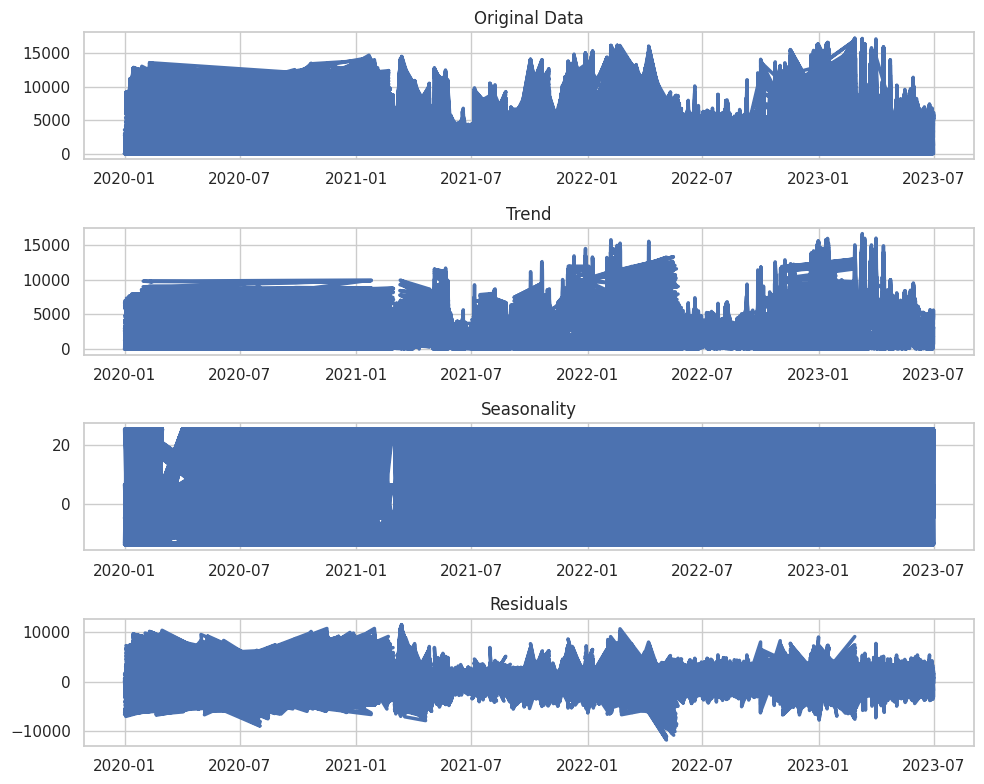

In [ ]:
# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(df['Production'], model='additive',period=5)

# Plot the original, trend, seasonal, and residual components
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(df['Production'])
plt.title('Original Data')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid)
plt.title('Residuals')

plt.tight_layout()
plt.show()


# 2.Analyze production trends over different dates, hours, and months.

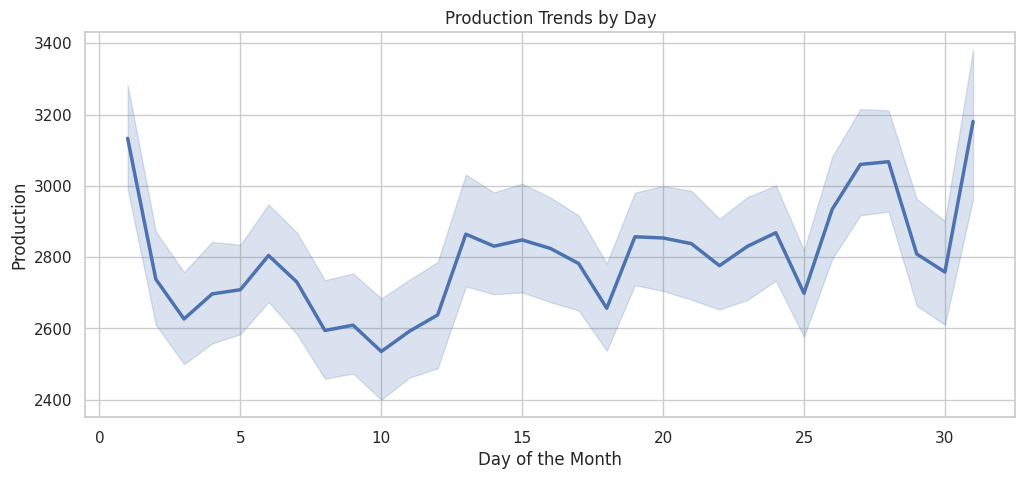

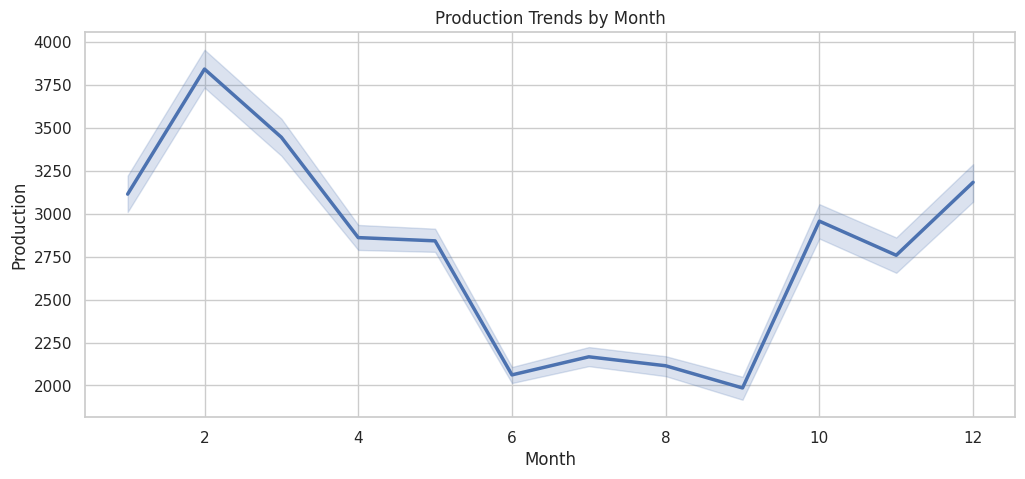

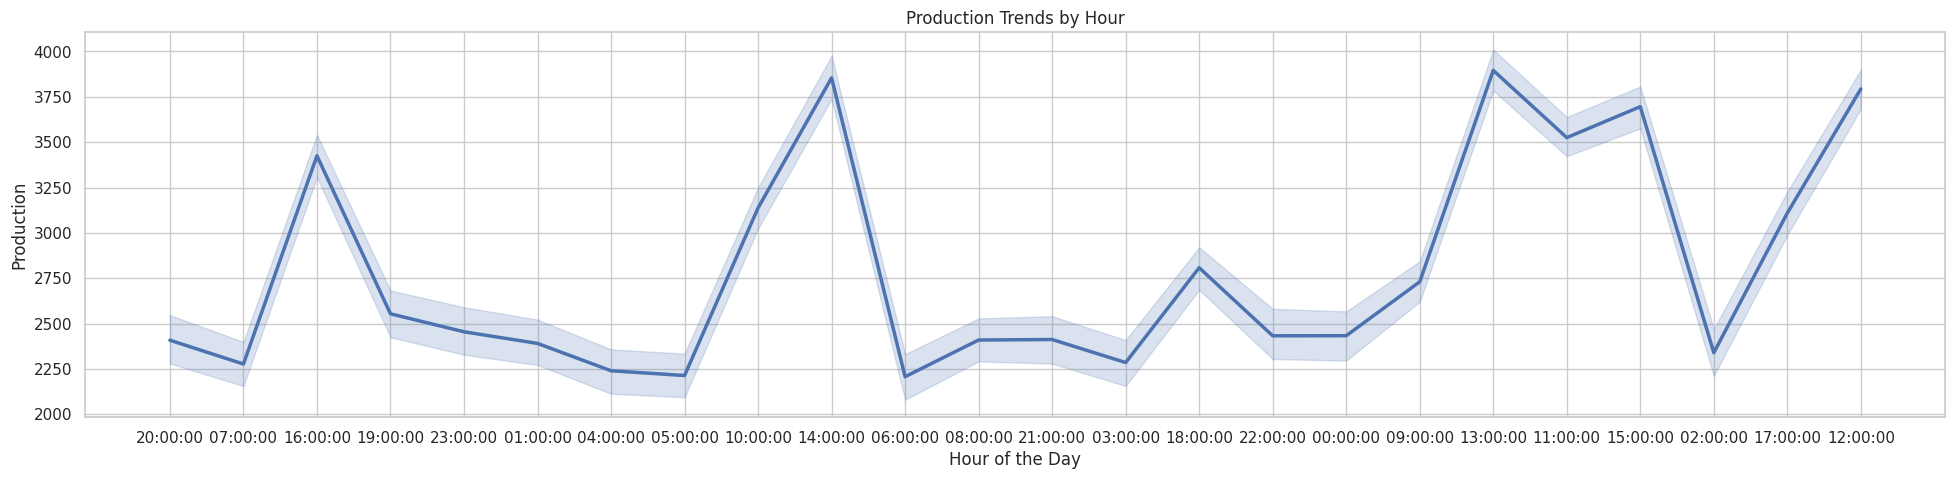

In [ ]:
# Create a new DataFrame for analysis
analysis_df = df.copy()

# Extract date-related attributes
analysis_df['Day'] = analysis_df.index.day
analysis_df['Month'] = analysis_df.index.month
analysis_df['Year'] = analysis_df.index.year
analysis_df['Hour'] = analysis_df['StartHour']
# Set Seaborn style
sns.set(style="whitegrid")
sns.set_context("notebook", rc={"lines.linewidth": 2.5})

# Plot production trends over different dates
plt.figure(figsize=(12, 5))
sns.lineplot(data=analysis_df, x='Day', y='Production')
plt.title('Production Trends by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Production')
plt.show()

# Plot production trends over different months
plt.figure(figsize=(12,5))
sns.lineplot(data=analysis_df, x='Month', y='Production')
plt.title('Production Trends by Month')
plt.xlabel('Month')
plt.ylabel('Production')
plt.show()

# Plot production trends over different hours
plt.figure(figsize=(24, 5))
sns.lineplot(data=analysis_df, x='Hour', y='Production')
plt.title('Production Trends by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Production')
plt.show()


# 3.Study variations in production across different data sources

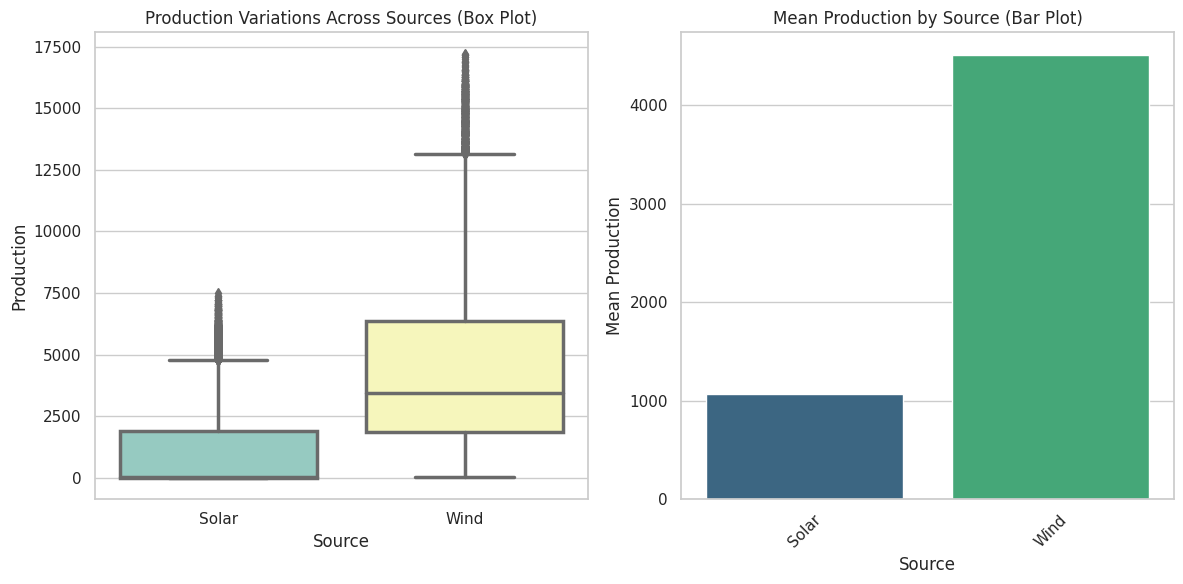

In [ ]:
source_stats = df.groupby('Source')['Production'].agg(['mean', 'median', 'std', 'min', 'max'])

# Data Visualization
plt.figure(figsize=(12, 6))

# Box plot to visualize production variations across sources
plt.subplot(1, 2, 1)
sns.boxplot(x='Source', y='Production', data=df, palette='Set3')
plt.title('Production Variations Across Sources (Box Plot)')
plt.xlabel('Source')
plt.ylabel('Production')

# Bar plot to compare mean production values for each source
plt.subplot(1, 2, 2)
sns.barplot(x=source_stats.index, y=source_stats['mean'], palette='viridis')
plt.title('Mean Production by Source (Bar Plot)')
plt.xlabel('Source')
plt.ylabel('Mean Production')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# 4.Analyze production patterns throughout different hours of the day

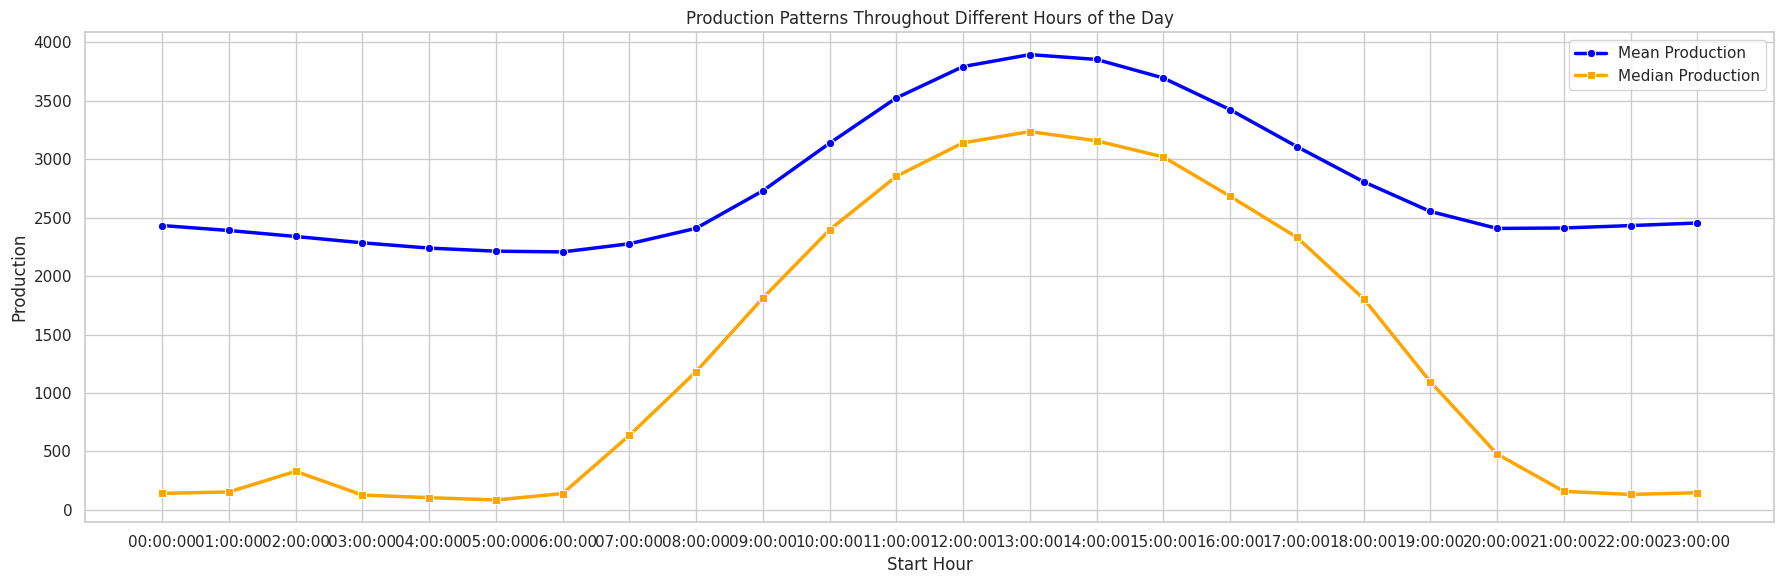

In [ ]:
# Group data by 'StartHour' and calculate summary statistics
hourly_stats = df.groupby('StartHour')['Production'].agg(['mean', 'median', 'std', 'min', 'max'])

# Data Visualization
plt.figure(figsize=(18, 6))

# Line plot to visualize production patterns throughout different hours
sns.lineplot(x=hourly_stats.index, y=hourly_stats['mean'], marker='o', color='blue', label='Mean Production')
sns.lineplot(x=hourly_stats.index, y=hourly_stats['median'], marker='s', color='orange', label='Median Production')

plt.title('Production Patterns Throughout Different Hours of the Day')
plt.xlabel('Start Hour')
plt.ylabel('Production')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# 5.Study how production varies based on the day of the week

In [ ]:
df['DayOfWeek'] = df['Date'].dt.day_name()


In [ ]:
grouped_data = df.groupby('DayOfWeek')


In [ ]:
summary_stats = grouped_data['Production'].describe()


<ipython-input-164-2735241dfe11>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='DayOfWeek', y='Production', data=df, ci=None, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


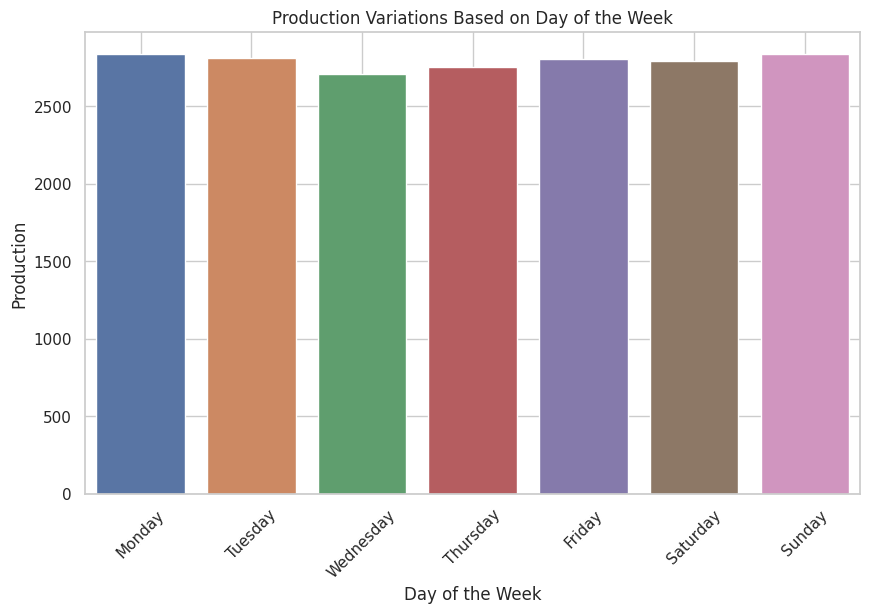

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Production', data=df, ci=None, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Production Variations Based on Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Production')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# 6.Analyze how production changes across different months

In [ ]:
df['Month'] = df['Date'].dt.month


In [ ]:
grouped_data = df.groupby('Month')


In [ ]:
summary_stats = grouped_data['Production'].describe()


<ipython-input-168-135f7ac32a2f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Production', data=df, ci=None)


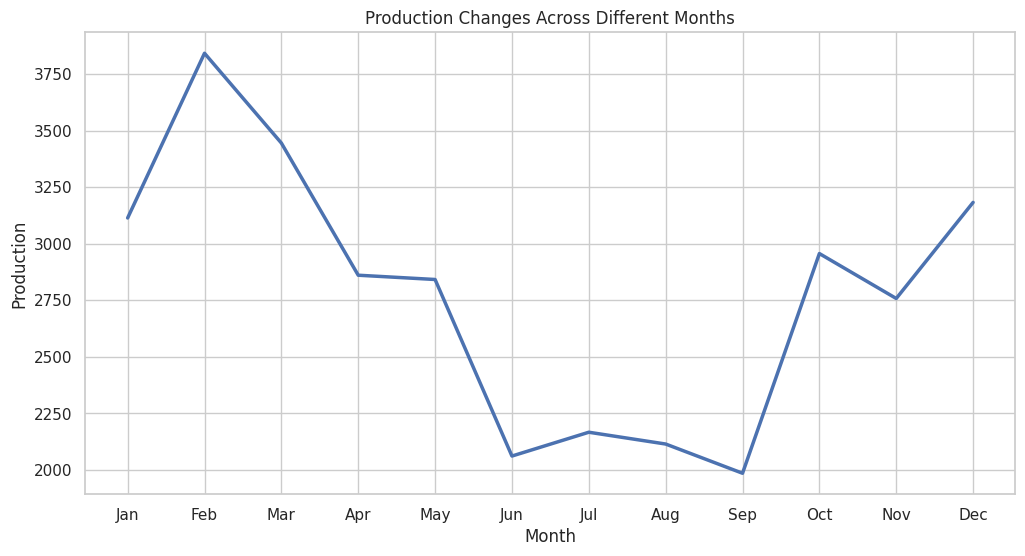

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Production', data=df, ci=None)
plt.title('Production Changes Across Different Months')
plt.xlabel('Month')
plt.ylabel('Production')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


# 7. Identify seasonal patterns or trends that repeat yearly.

In [ ]:
df.columns

Index(['Date', 'StartHour', 'EndHour', 'Source', 'Production', 'dayOfYear',
       'dayName', 'monthName', 'DayOfWeek', 'Month'],
      dtype='object')

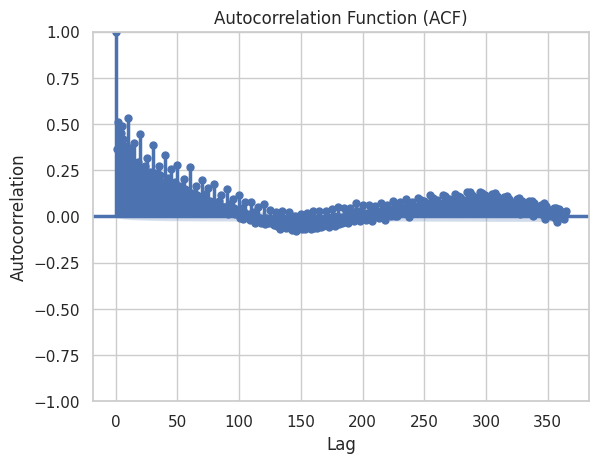

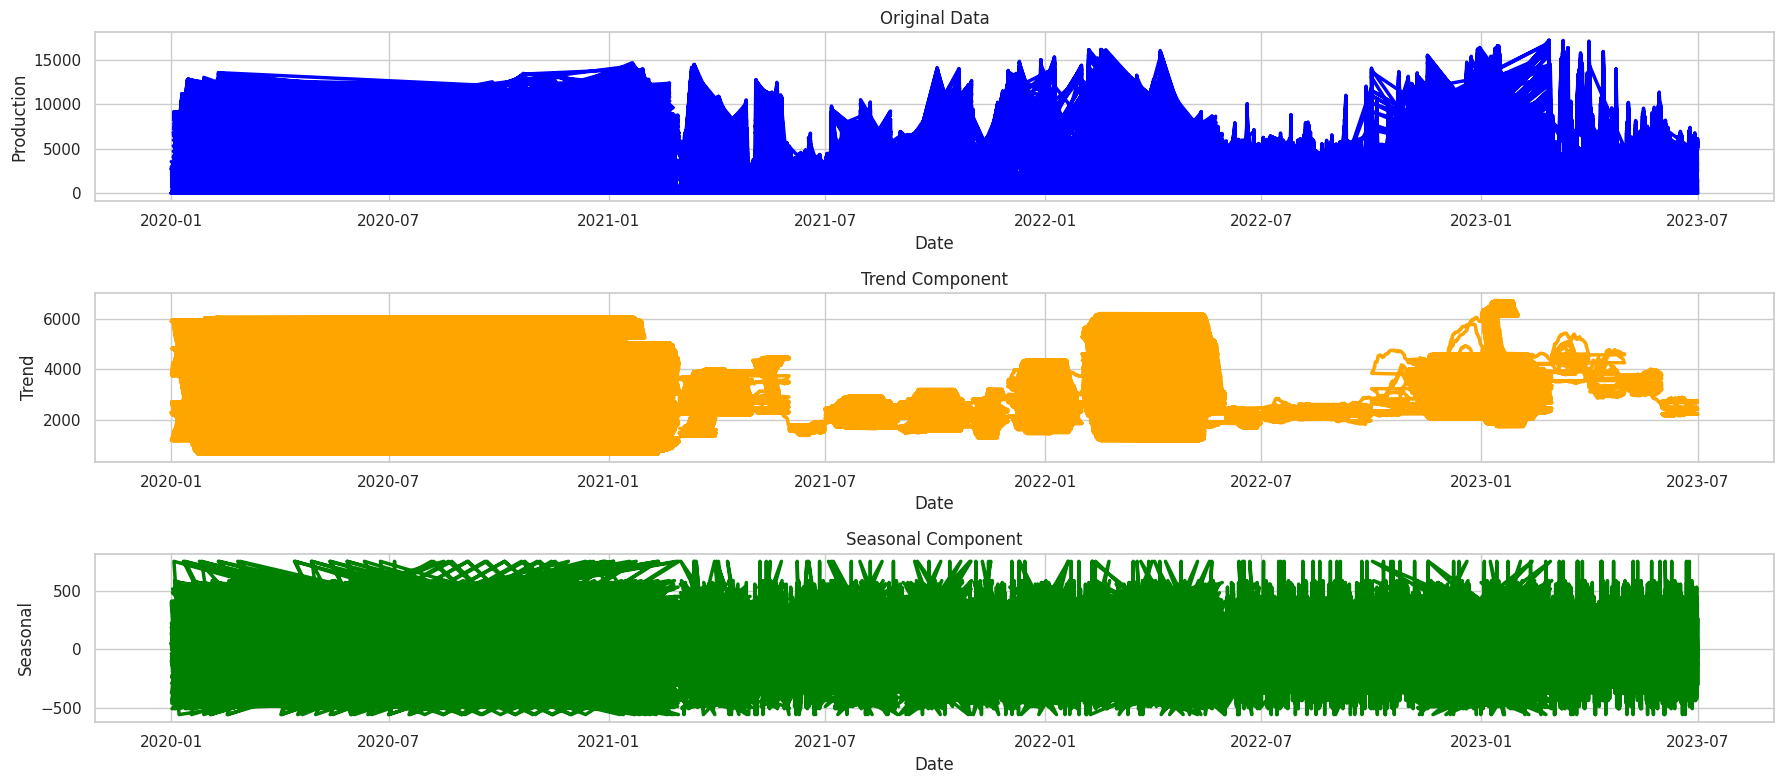

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Seasonal Decomposition
decomposition = sm.tsa.seasonal_decompose(df['Production'], model='additive', period=365)

# Autocorrelation Analysis
plot_acf(df['Production'], lags=365)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Data Visualization
plt.figure(figsize=(18, 8))

# Plot the original data
plt.subplot(3, 1, 1)
plt.plot(df.index, df['Production'], label='Original', color='blue')
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('Production')

# Plot the trend component
plt.subplot(3, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')

# Plot the seasonal component
plt.subplot(3, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal')

plt.tight_layout()
plt.show()


# 8.Compare production data and patterns across different sources.

In [ ]:
grouped_data = df.groupby('Source')


In [ ]:
# Summary Statistics:
summary_stats = grouped_data['Production'].describe()


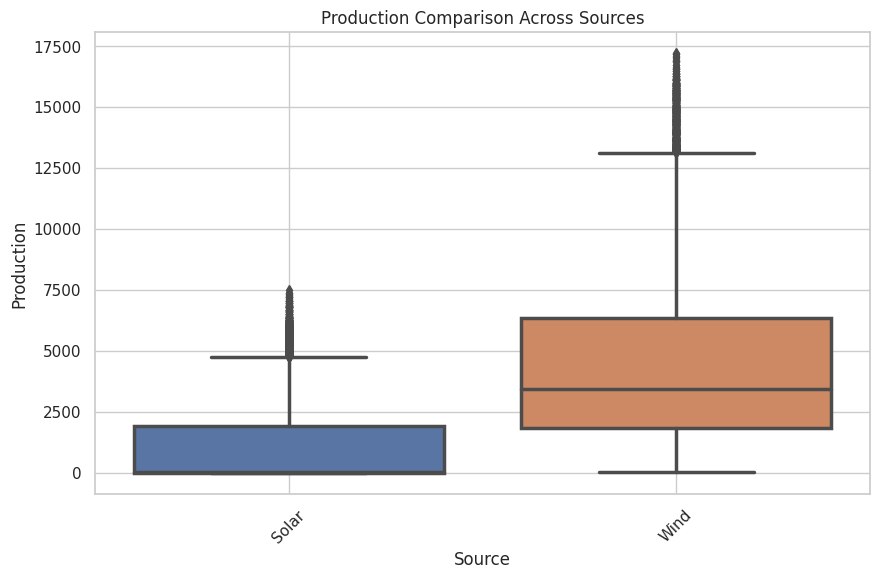

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Production', data=df)
plt.title('Production Comparison Across Sources')
plt.xlabel('Source')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# 9.Use data visualization to present insights on production trends, patterns, and variations.

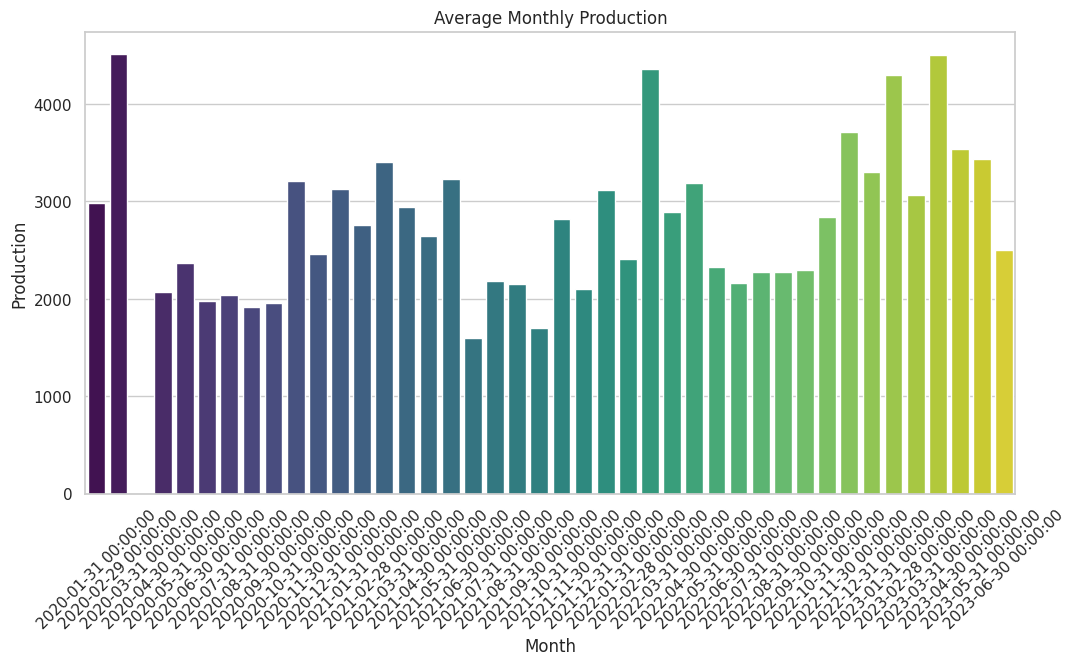

In [ ]:
#Bar Plot for Monthly Production
import seaborn as sns

# Resample data by month and calculate the mean production for each month
monthly_production = df['Production'].resample('M').mean()

# Plot the monthly production using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_production.index, y=monthly_production.values, palette='viridis')
plt.title('Average Monthly Production')
plt.xlabel('Month')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.show()


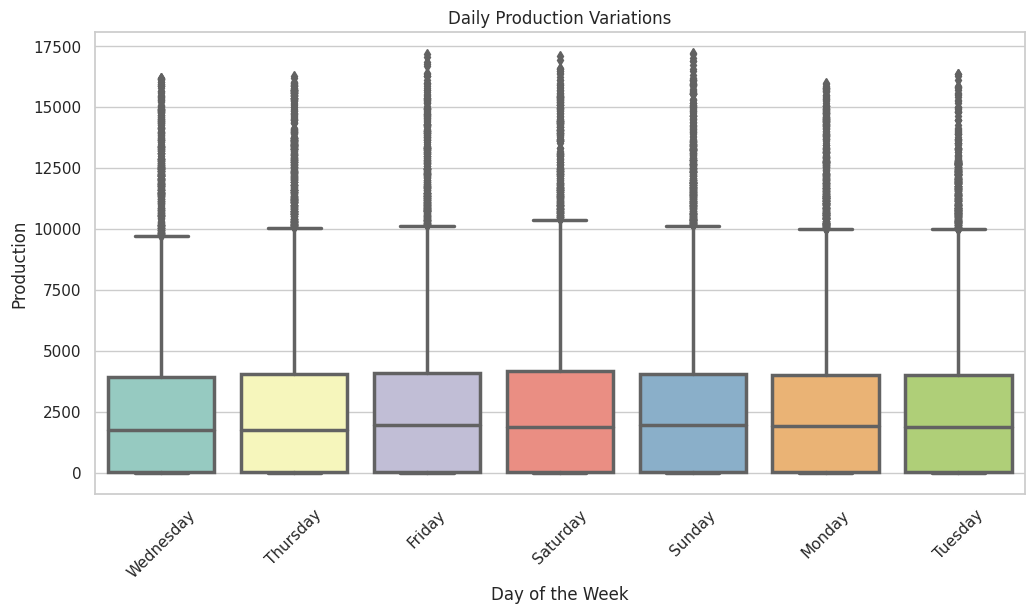

In [ ]:
import seaborn as sns

# Resample data by day and create a box plot to visualize daily production variations
plt.figure(figsize=(12, 6))
sns.boxplot(x=df.index.day_name(), y=df['Production'], palette='Set3')
plt.title('Daily Production Variations')
plt.xlabel('Day of the Week')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.show()


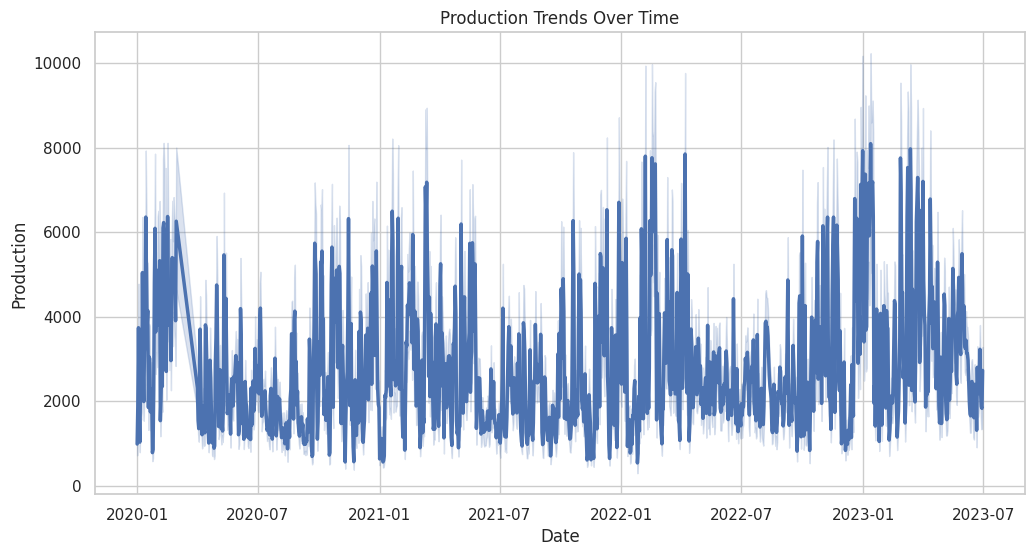

In [ ]:
# Time Series Line Plots:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Production', data=df)
plt.title('Production Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()


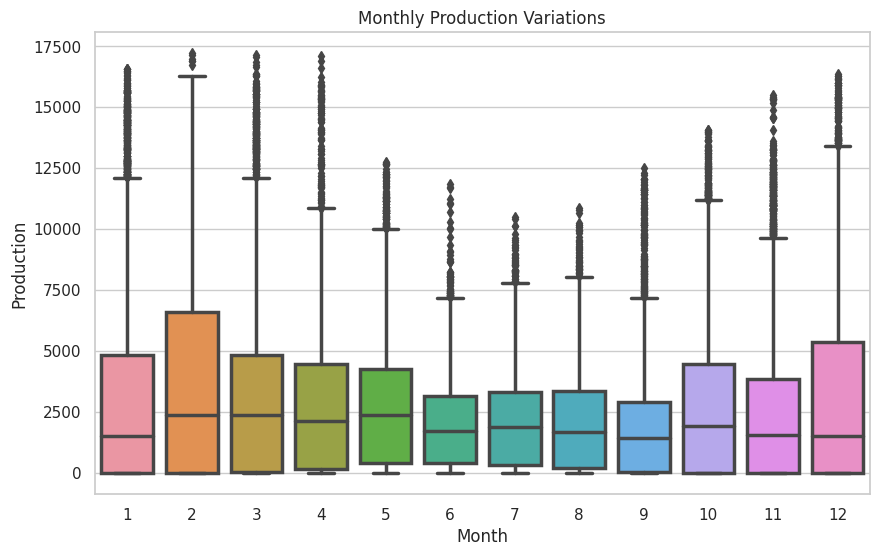

In [ ]:
# Box Plots for Monthly or Weekly Patterns:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Production', data=df)
plt.title('Monthly Production Variations')
plt.xlabel('Month')
plt.ylabel('Production')
plt.show()


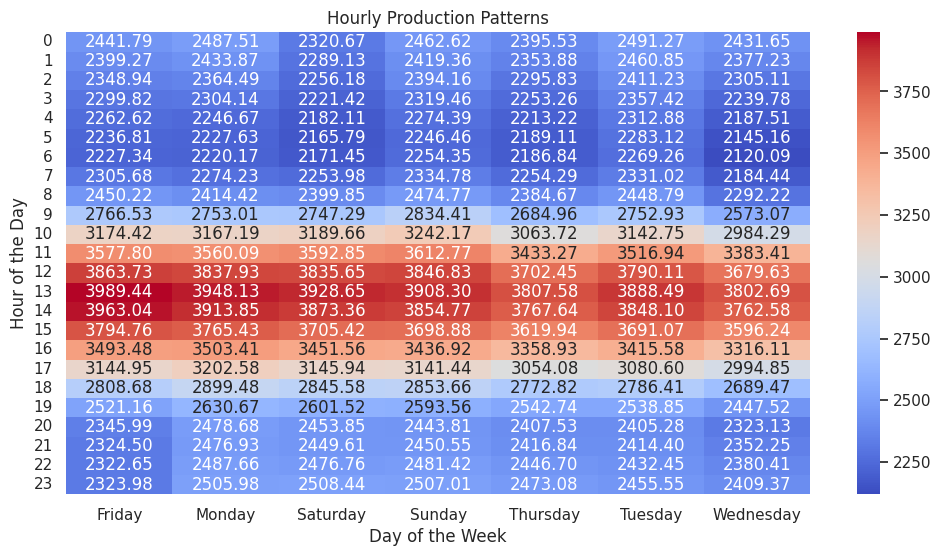

In [ ]:
# Create a pivot table to visualize hourly production patterns
hourly_production = df.pivot_table(index=df.index.hour, columns=df.index.day_name(), values='Production', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_production, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Hourly Production Patterns')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()


# 10.Build models to predict future production based on historical patterns.

Data is stationary.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Root Mean Squared Error (RMSE): 4267.329300042037


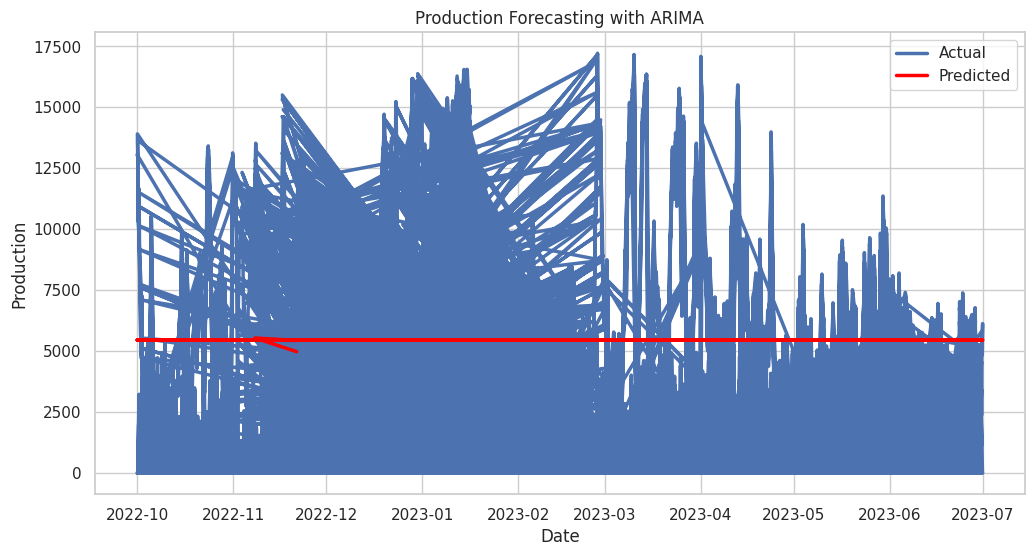

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

# Example stationarity check
result = adfuller(df['Production'])
if result[1] <= 0.05:
    print("Data is stationary.")
else:
    print("Data is not stationary. Differencing may be required.")

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Build and fit the ARIMA model
p, d, q = 1, 1, 1
model = ARIMA(train['Production'], order=(p, d, q))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Evaluate the model
mse = mean_squared_error(test['Production'], predictions)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Production'], label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('Production Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()


# 11.Identify unusual production spikes or drops and investigate their causes

Unusual Production Spikes or Drops:
                          Date StartHour   EndHour Source  Production  \
Timestamp                                                               
2020-01-09 07:00:00 2020-01-09  07:00:00  08:00:00   Wind      9902.0   
2020-01-09 11:00:00 2020-01-09  11:00:00  12:00:00   Wind     10329.0   
2020-01-09 13:00:00 2020-01-09  13:00:00  14:00:00   Wind     10074.0   
2020-01-09 16:00:00 2020-01-09  16:00:00  17:00:00   Wind     10111.0   
2020-01-09 18:00:00 2020-01-09  18:00:00  19:00:00   Wind     10757.0   
...                        ...       ...       ...    ...         ...   
2023-05-16 15:00:00 2023-05-16  15:00:00  16:00:00   Wind      9349.0   
2023-05-16 16:00:00 2023-05-16  16:00:00  17:00:00   Wind      9554.0   
2023-05-29 23:00:00 2023-05-29  23:00:00  24:00:00   Wind     10408.0   
2023-05-30 00:00:00 2023-05-30  00:00:00  01:00:00   Wind      9780.0   
2023-05-30 22:00:00 2023-05-30  22:00:00  23:00:00   Wind      9845.0   

              

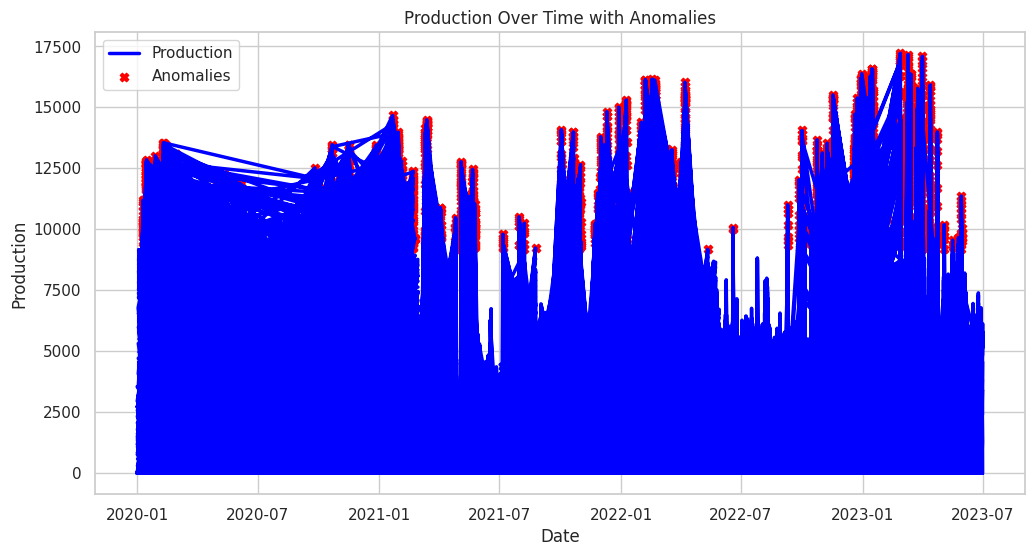

In [ ]:
# Convert 'Production' to numeric
df['Production'] = pd.to_numeric(df['Production'], errors='coerce')

# Calculate mean and standard deviation for 'Production'
mean_production = df['Production'].mean()
std_production = df['Production'].std()

# Set the threshold for anomaly detection (e.g., 2 standard deviations)
threshold = 2 * std_production

# Identify unusual production spikes or drops
anomalies = df[(df['Production'] > mean_production + threshold) | (df['Production'] < mean_production - threshold)]

# Print the identified anomalies
print('Unusual Production Spikes or Drops:')
print(anomalies)

# Plot the production data with identified anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Production'], label='Production', color='blue')
plt.scatter(anomalies.index, anomalies['Production'], color='red', marker='X', label='Anomalies')
plt.title('Production Over Time with Anomalies')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.show()


# 12.Study differences in production between daytime and nighttime hours.

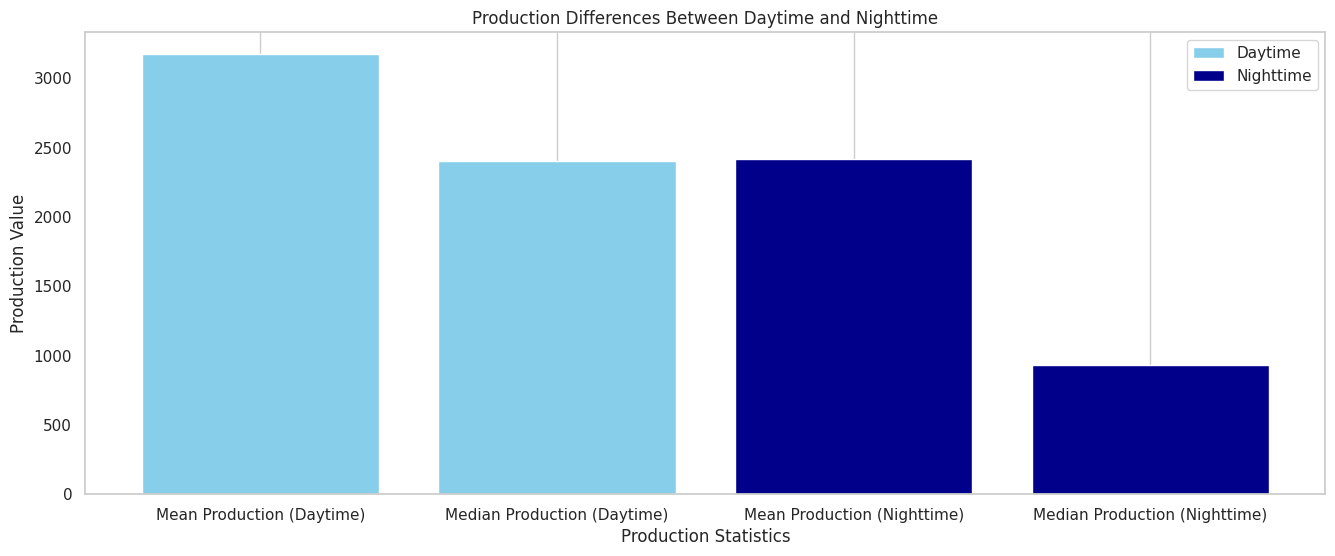

Daytime Production Statistics:
{'Mean Production (Daytime)': 3171.6287118780097, 'Median Production (Daytime)': 2404.0}

Nighttime Production Statistics:
{'Mean Production (Nighttime)': 2414.0655046334873, 'Median Production (Nighttime)': 932.0}


In [ ]:
df['Production'] = pd.to_numeric(df['Production'], errors='coerce')

# Define daytime and nighttime hours (adjust as needed)
daytime_start = pd.to_datetime('06:00:00').time()
daytime_end = pd.to_datetime('18:00:00').time()

# Create a mask to filter daytime and nighttime data
daytime_mask = (df.index.time >= daytime_start) & (df.index.time < daytime_end)
nighttime_mask = ~daytime_mask

# Separate daytime and nighttime data
daytime_data = df[daytime_mask]
nighttime_data = df[nighttime_mask]

# Calculate statistics for daytime and nighttime production
daytime_stats = {
    'Mean Production (Daytime)': daytime_data['Production'].mean(),
    'Median Production (Daytime)': daytime_data['Production'].median()
}

nighttime_stats = {
    'Mean Production (Nighttime)': nighttime_data['Production'].mean(),
    'Median Production (Nighttime)': nighttime_data['Production'].median()
}

# Visualize the differences using bar plots
plt.figure(figsize=(16, 6))
plt.bar(daytime_stats.keys(), daytime_stats.values(), color='skyblue', label='Daytime')
plt.bar(nighttime_stats.keys(), nighttime_stats.values(), color='darkblue', label='Nighttime')
plt.xlabel('Production Statistics')
plt.ylabel('Production Value')
plt.title('Production Differences Between Daytime and Nighttime')
plt.legend()
plt.grid(axis='y')
plt.show()

# Print the calculated statistics
print('Daytime Production Statistics:')
print(daytime_stats)
print('\nNighttime Production Statistics:')
print(nighttime_stats)


# 13.Compare production across different days of the week or months

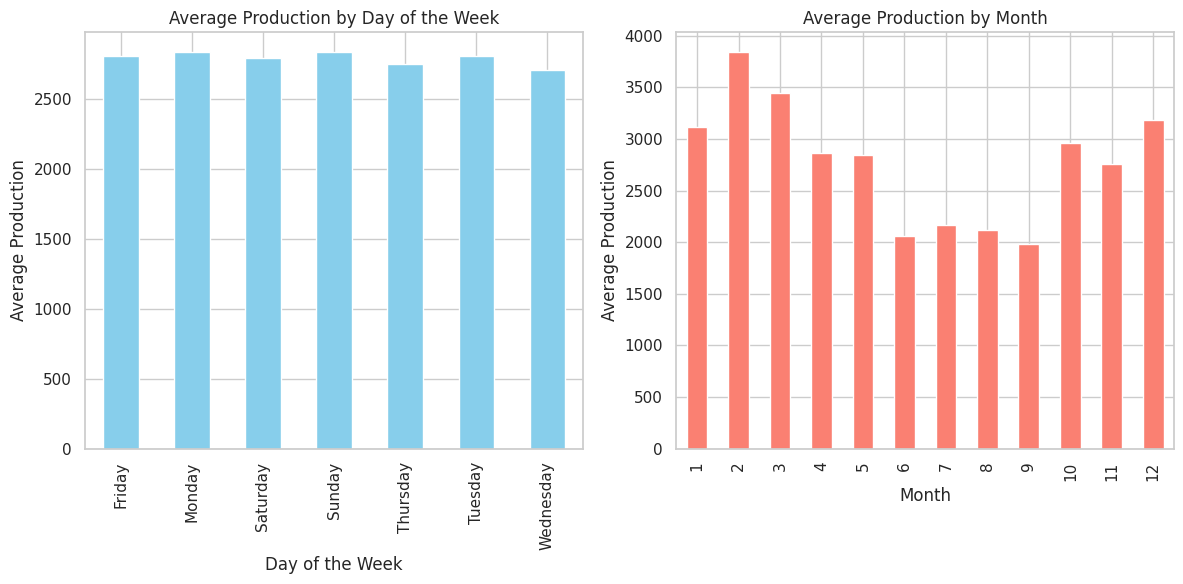

Average Production by Day of the Week:
Timestamp
Friday       2807.817621
Monday       2837.673258
Saturday     2794.446395
Sunday       2837.055653
Thursday     2753.287826
Tuesday      2813.556968
Wednesday    2707.425628
Name: Production, dtype: float64

Average Production by Month:
Timestamp
1     3114.098958
2     3842.207596
3     3445.205318
4     2860.977431
5     2842.064684
6     2061.593229
7     2166.870296
8     2114.717294
9     1985.552778
10    2956.727497
11    2758.136806
12    3182.893817
Name: Production, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Production' to numeric
df['Production'] = pd.to_numeric(df['Production'], errors='coerce')

# Group data by days of the week and calculate mean production
daily_production = df.groupby(df.index.day_name())['Production'].mean()

# Group data by months and calculate mean production
monthly_production = df.groupby(df.index.month)['Production'].mean()

# Visualize the comparison using bar plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
daily_production.plot(kind='bar', color='skyblue')
plt.title('Average Production by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Production')

plt.subplot(1, 2, 2)
monthly_production.plot(kind='bar', color='salmon')
plt.title('Average Production by Month')
plt.xlabel('Month')
plt.ylabel('Average Production')

plt.tight_layout()
plt.show()

# Print the calculated statistics
print('Average Production by Day of the Week:')
print(daily_production)
print('\nAverage Production by Month:')
print(monthly_production)


# 14.Analyze how production changes from one month to another.

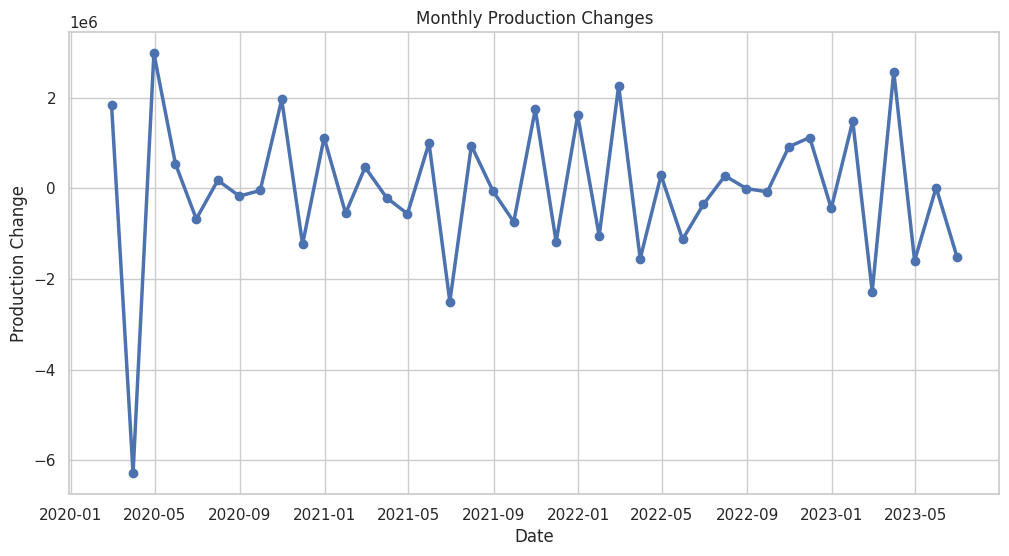

In [ ]:
# Resample the data to monthly frequency and sum production values for each month
monthly_production = df['Production'].resample('M').sum()

# Calculate month-to-month changes in production values
monthly_changes = monthly_production.diff()

# Data Visualization
plt.figure(figsize=(12, 6))

# Line plot to visualize monthly production changes
plt.plot(monthly_changes.index, monthly_changes.values, marker='o', linestyle='-')
plt.title('Monthly Production Changes')
plt.xlabel('Date')
plt.ylabel('Production Change')
plt.grid(True)

plt.show()
